In [25]:
import os
import sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#import nipes_data_fcts as nidf
import me_data_fcts as medf
#from statannotations.Annotator import Annotator


In [26]:
import importlib
importlib.reload(medf)

<module 'me_data_fcts' from '/are/AREFramework/experiments/scripts/me_data_fcts.py'>

In [27]:
#repo_folder = "/media/leni/DATADRIVE1/are-logs/"
repo_folder = "/are/logs/are/meim_env_pressure/meim_env/"

In [28]:
#mehk_flat_folder = repo_folder + "flat/"
mehk_t1_folder = repo_folder + "terrain_1/"
#mehk_t2_folder = repo_folder + "terrain_2/"
mehk_t3_folder = repo_folder + "terrain_3/"
mehk_hill_folder = repo_folder + "hill/"
mehk_corridor_folder = repo_folder + "corridor/"

In [29]:
# TODO call filter_to_parent_pool from medf rather than this one (already updated the python file)
def filter_to_parent_pool(data,parent_ids):
    filtered = []
    data_dict = {d[0]: d[1:].__add__([idx]) for idx, d in enumerate(data)}
    prev_ids = []
    iter = 0
    ind_idx = 0
    for ids in parent_ids:
        if(len(ids) != len(parent_ids[0])):
            continue
        ind_idx = len(data[:max(ids)])
        disc_idx = round(ind_idx/50)*50
        for _id in ids:
            filtered.append([iter,_id,disc_idx,ind_idx,len(list(set(ids)-set(prev_ids)))] + data_dict[_id])
        prev_ids = ids
        iter+=1

    return filtered

In [6]:
# Flat terrain (from MEHK ICRA)
experiments_loaded = 0
parent_fits = []
for folder in os.listdir(mehk_flat_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_flat_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_flat_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_flat_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += filter_to_parent_pool(fits, parent_ids)
    experiments_loaded += 1
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate", "replicate_index"])
par_fit_data["environment"] = "flat"
print("Total experiments loaded: ", experiments_loaded)

meim_2_7_14-25-40-717-1725254852
meim_6_6_1-7-36-6550-3419932571
meim_30_6_13-25-55-5252-295499761
meim_28_7_15-26-15-5188-3832479087
meim_25_6_16-24-32-2848-3749627413
meim_29_7_15-31-53-3720-2381391459
meim_25_6_16-25-2-2768-2729908547
meim_5_6_10-50-42-2727-1635008145
meim_30_7_12-24-3-3001-3597601394
meim_5_6_11-5-41-1708-1861126324
meim_29_7_23-0-55-5678-3522236714
meim_28_6_16-32-59-9325-1260595937
meim_4_6_16-59-52-2124-2763705642
meim_6_6_5-13-15-5219-3432938375
meim_2_7_14-25-43-3606-2511048878
meim_4_6_16-59-49-9078-3493767385
meim_28_7_15-26-14-4991-3214767790
meim_1_7_13-48-4-4412-2005753728
meim_28_7_14-6-44-4259-3823527096
meim_28_7_15-26-15-5072-1856930231
Total experiments loaded:  20


In [43]:
# Terrain 1 : rough
experiments_loaded = 0
parent_fits = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t1_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_t1_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_t1_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += filter_to_parent_pool(fits,parent_ids)
    experiments_loaded += 1
print("Total experiments loaded: ", experiments_loaded)    
par_fit_data2 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate", "replicate_index"])
par_fit_data2["environment"] = "rough"

meim_env_pressure_13_0_15-7-30-600-3387006090
meim_env_pressure_18_0_0-2-30-503-2667642410
meim_env_pressure_16_0_13-14-53-3493-2600027928
meim_env_pressure_16_0_22-30-27-7020-3767108756
meim_env_pressure_14_0_20-49-57-7984-2503842223
meim_env_pressure_14_0_19-49-25-5042-3843521264
meim_env_pressure_17_0_11-10-57-7088-3696739141
meim_env_pressure_13_0_22-46-5-5170-2720413242
meim_env_pressure_22_0_15-27-57-7572-2826361338
meim_env_pressure_17_0_21-31-49-9173-2760130346
meim_env_pressure_23_0_14-1-58-8688-4238158050
meim_env_pressure_13_0_22-35-11-1148-3327391022
meim_env_pressure_16_0_13-14-51-1511-1972150482
meim_env_pressure_16_0_13-14-48-8414-1167938810
meim_env_pressure_13_0_12-18-16-6528-443972455
meim_env_pressure_14_0_13-6-46-6105-4077587845
meim_env_pressure_17_0_21-56-52-2077-329315061
meim_env_pressure_23_0_14-1-56-6759-1204360480
meim_env_pressure_13_0_15-7-30-387-3282607704
meim_env_pressure_13_0_12-18-18-8515-2769036070
meim_env_pressure_16_0_23-19-34-4035-1661290298
Total

In [100]:
par_fit_data2[par_fit_data2["fitness"] == 0.03125][par_fit_data2["robot index"] == 10612]

/tmp/ipykernel_3357/3115476469.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  par_fit_data2[par_fit_data2["fitness"] == 0.03125][par_fit_data2["robot index"] == 10612]


,iteration,robot index,discretized number of robots,number of individuals,number new inds,parent 1,parent 2,evaluation time,time,fitness,replicate,replicate_index,environment


In [44]:
# Terrain 3 - holes
parent_fits = []
experiments_loaded = 0
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t3_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_t3_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_t3_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += filter_to_parent_pool(fits,parent_ids)
    experiments_loaded += 1
print("Total experiments loaded: ", experiments_loaded)     
par_fit_data4 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate", "replicate_index"])
par_fit_data4["environment"] = "holes"

meim_env_pressure_13_0_16-2-45-5131-3133728638
meim_env_pressure_17_0_10-56-10-87-3224168498
meim_env_pressure_13_0_12-19-56-6532-918908569
meim_env_pressure_14_0_11-41-14-4036-2674865236
meim_env_pressure_13_0_12-17-53-3485-1947333064
meim_env_pressure_17_0_10-56-16-6463-2113247102
meim_env_pressure_17_0_10-56-17-7980-3009128605
meim_env_pressure_17_0_0-18-21-1124-2569587422
meim_env_pressure_22_0_9-35-16-6027-1318951971
meim_env_pressure_17_0_0-7-37-7190-1547867500
meim_env_pressure_17_0_11-9-54-4104-132613278
meim_env_pressure_16_0_23-34-30-103-3212252362
meim_env_pressure_13_0_22-32-29-9168-3943053088
meim_env_pressure_17_0_0-22-3-3088-1161040689
meim_env_pressure_14_0_11-18-38-8163-931723730
meim_env_pressure_13_0_12-19-53-3623-1568860632
meim_env_pressure_16_0_23-44-23-3103-1579083871
meim_env_pressure_22_0_10-33-58-8126-1846744588
meim_env_pressure_14_0_10-58-32-2086-3419700486
meim_env_pressure_14_0_10-58-35-5025-3463452074
Total experiments loaded:  20


In [45]:
# Hill
parent_fits = []
experiments_loaded = 0
for folder in os.listdir(mehk_hill_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_hill_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_hill_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_hill_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += filter_to_parent_pool(fits,parent_ids)
    experiments_loaded += 1
print("Total experiments loaded: ", experiments_loaded)     
par_fit_data5 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate", "replicate_index"])
par_fit_data5["environment"] = "hill"

meim_env_pressure_14_0_21-8-46-6171-1088200090
meim_env_pressure_14_0_2-2-28-8104-2843173586
meim_env_pressure_14_0_2-14-2-2117-1470736344
meim_env_pressure_22_0_8-24-30-99-1028918243
meim_env_pressure_18_0_8-17-10-52-3916310037
meim_env_pressure_14_0_7-53-47-7050-2755637213
meim_env_pressure_16_0_13-14-32-2584-2438116876
meim_env_pressure_16_0_13-14-35-5514-983190446
meim_env_pressure_14_0_22-14-52-2165-1216259645
meim_env_pressure_13_0_23-16-24-4120-694514269
meim_env_pressure_15_0_1-31-20-42-1785020082
meim_env_pressure_14_0_8-23-53-3032-3104897786
meim_env_pressure_16_0_13-14-26-6549-3754694820
meim_env_pressure_16_0_13-14-38-8600-786286838
meim_env_pressure_15_0_1-26-16-6010-2152763288
meim_env_pressure_18_0_9-3-41-1106-2378742474
meim_env_pressure_16_0_13-14-29-9506-2279773335
meim_env_pressure_22_0_9-16-18-8115-2309876279
meim_env_pressure_13_0_22-57-6-6137-1464868196
meim_env_pressure_18_0_3-7-50-99-3949370651
Total experiments loaded:  20


In [46]:
# Corridor
parent_fits = []
experiments_loaded = 0
for folder in os.listdir(mehk_corridor_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_corridor_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_corridor_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_corridor_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += filter_to_parent_pool(fits,parent_ids)
    experiments_loaded += 1
print("Total experiments loaded: ", experiments_loaded)     
par_fit_data6 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate", "replicate_index"])
par_fit_data6["environment"] = "corridor"

meim_env_pressure_22_0_23-46-22-2477-1358352833
meim_env_pressure_21_0_15-4-4-4149-3471933860
meim_env_pressure_21_0_23-35-48-8148-2605499614
meim_env_pressure_21_0_13-15-17-7593-2810911125
meim_env_pressure_21_0_22-52-48-8054-3963555527
meim_env_pressure_22_0_20-31-57-7798-3917953758
meim_env_pressure_22_0_20-17-26-6568-2358104570
meim_env_pressure_21_0_13-15-23-3568-4151222338
meim_env_pressure_22_0_20-9-26-6395-3115374187
meim_env_pressure_21_0_22-58-8-8047-3161988788
meim_env_pressure_21_0_13-15-9-9527-992733859
meim_env_pressure_21_0_23-49-31-1050-4131365314
meim_env_pressure_21_0_13-14-59-9455-3613682677
meim_env_pressure_21_0_13-15-17-7548-2705840735
meim_env_pressure_22_0_8-13-46-6031-2692149765
meim_env_pressure_22_0_7-2-33-3151-2629363064
meim_env_pressure_22_0_1-5-49-9073-2631536415
meim_env_pressure_21_0_13-15-20-595-2283069330
meim_env_pressure_21_0_13-15-13-3453-3496313023
meim_env_pressure_21_0_17-50-56-6013-19038999
meim_env_pressure_21_0_21-44-40-1-3754474438
meim_env_

In [80]:
fit_data = pd.concat([#par_fit_data, #flat
                      par_fit_data2, #rough
                      par_fit_data4, #holes
                      par_fit_data5, #hill
                      par_fit_data6 #corridor
                     ]).reset_index(drop=True)


In [48]:
# Selecting highest robot per replicate
fit_max_data = []
for env in fit_data["environment"].drop_duplicates():
    tmp_data = fit_data.loc[fit_data["environment"] == env]
    for rep in tmp_data["replicate"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["replicate"] == rep]
        fit_max_data.append(pd.DataFrame(tmp_data2.max(numeric_only=True)).transpose())
        fit_max_data[-1]["replicate"] = rep
        fit_max_data[-1]["environment"] = env
            
fit_max_data = pd.concat(fit_max_data)
fit_max_data.index = [i for i in range(len(fit_max_data))]

# Exploration score

/tmp/ipykernel_3357/2481380170.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["flat", "rough", "holes", "hill", "corridor"])


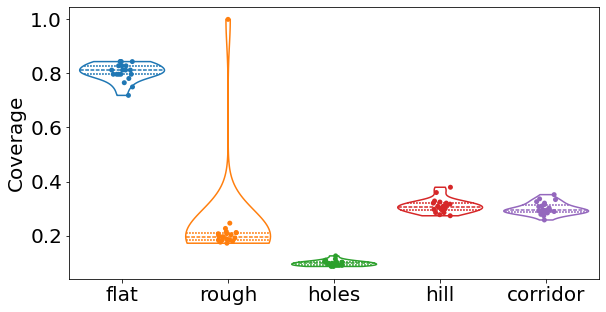

In [13]:
fig = plt.gcf()
fig.set_size_inches(9.5,5)
ax = sns.violinplot(fit_max_data,x="environment",hue="environment",y="fitness",fill=False,inner="quart", cut=0)
sns.stripplot(fit_max_data,x="environment",hue="environment",y="fitness")
ax.set_xlabel("")
ax.set_xticklabels(["flat", "rough", "holes", "hill", "corridor"])
ax.set_ylabel("Coverage")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("img_gecco/exploration_score_nf.png")


In [14]:
# flat
parent_descs = []
for folder in os.listdir(mehk_flat_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_flat_folder + "/" + folder + "/parent_pool.csv")
    #print("parent ids: ", len(parent_ids))
    descriptors = medf.load_feature_descriptor(mehk_flat_folder + "/" + folder + "/morph_features.csv")
    #print("descriptors: ", len(descriptors))
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    #print("descs: ", len(descs))
    parent_descs += filter_to_parent_pool(descs,parent_ids)
    #print("parent descs: ", len(parent_descs))
    #print(type(parent_descs))
    #break

par_desc_data1 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","arms","casters","norm","skeleton norm","components norm","replicate", "replicate_index"])
par_desc_data1["environment"] = "flat"

meim_2_7_14-25-40-717-1725254852
meim_6_6_1-7-36-6550-3419932571
meim_30_6_13-25-55-5252-295499761
meim_28_7_15-26-15-5188-3832479087
meim_25_6_16-24-32-2848-3749627413
meim_29_7_15-31-53-3720-2381391459
meim_25_6_16-25-2-2768-2729908547
meim_5_6_10-50-42-2727-1635008145
meim_30_7_12-24-3-3001-3597601394
meim_5_6_11-5-41-1708-1861126324
meim_29_7_23-0-55-5678-3522236714
meim_28_6_16-32-59-9325-1260595937
meim_4_6_16-59-52-2124-2763705642
meim_6_6_5-13-15-5219-3432938375
meim_2_7_14-25-43-3606-2511048878
meim_4_6_16-59-49-9078-3493767385
meim_28_7_15-26-14-4991-3214767790
meim_1_7_13-48-4-4412-2005753728
meim_28_7_14-6-44-4259-3823527096
meim_28_7_15-26-15-5072-1856930231


In [162]:
# rough
parent_descs = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t1_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_t1_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += filter_to_parent_pool(descs,parent_ids)

par_desc_data2 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","arms","casters","norm","skeleton norm","components norm","replicate", "replicate_index"])
par_desc_data2["environment"] = "rough"

meim_env_pressure_13_0_15-7-30-600-3387006090
meim_env_pressure_18_0_0-2-30-503-2667642410
meim_env_pressure_16_0_13-14-53-3493-2600027928
meim_env_pressure_16_0_22-30-27-7020-3767108756
meim_env_pressure_14_0_20-49-57-7984-2503842223
meim_env_pressure_14_0_19-49-25-5042-3843521264
meim_env_pressure_17_0_11-10-57-7088-3696739141
meim_env_pressure_13_0_22-46-5-5170-2720413242
meim_env_pressure_22_0_15-27-57-7572-2826361338
meim_env_pressure_17_0_21-31-49-9173-2760130346
meim_env_pressure_23_0_14-1-58-8688-4238158050
meim_env_pressure_13_0_22-35-11-1148-3327391022
meim_env_pressure_16_0_13-14-51-1511-1972150482
meim_env_pressure_16_0_13-14-48-8414-1167938810
meim_env_pressure_13_0_12-18-16-6528-443972455
meim_env_pressure_14_0_13-6-46-6105-4077587845
meim_env_pressure_17_0_21-56-52-2077-329315061
meim_env_pressure_23_0_14-1-56-6759-1204360480
meim_env_pressure_13_0_15-7-30-387-3282607704
meim_env_pressure_13_0_12-18-18-8515-2769036070
meim_env_pressure_16_0_23-19-34-4035-1661290298


In [163]:
# holes
parent_descs = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t3_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_t3_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += filter_to_parent_pool(descs,parent_ids)

par_desc_data4 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","arms","casters","norm","skeleton norm","components norm","replicate", "replicate_index"])
par_desc_data4["environment"] = "holes"

meim_env_pressure_13_0_16-2-45-5131-3133728638
meim_env_pressure_17_0_10-56-10-87-3224168498
meim_env_pressure_13_0_12-19-56-6532-918908569
meim_env_pressure_14_0_11-41-14-4036-2674865236
meim_env_pressure_13_0_12-17-53-3485-1947333064
meim_env_pressure_17_0_10-56-16-6463-2113247102
meim_env_pressure_17_0_10-56-17-7980-3009128605
meim_env_pressure_17_0_0-18-21-1124-2569587422
meim_env_pressure_22_0_9-35-16-6027-1318951971
meim_env_pressure_17_0_0-7-37-7190-1547867500
meim_env_pressure_17_0_11-9-54-4104-132613278
meim_env_pressure_16_0_23-34-30-103-3212252362
meim_env_pressure_13_0_22-32-29-9168-3943053088
meim_env_pressure_17_0_0-22-3-3088-1161040689
meim_env_pressure_14_0_11-18-38-8163-931723730
meim_env_pressure_13_0_12-19-53-3623-1568860632
meim_env_pressure_16_0_23-44-23-3103-1579083871
meim_env_pressure_22_0_10-33-58-8126-1846744588
meim_env_pressure_14_0_10-58-32-2086-3419700486
meim_env_pressure_14_0_10-58-35-5025-3463452074


In [164]:
# hill
parent_descs = []
for folder in os.listdir(mehk_hill_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_hill_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_hill_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += filter_to_parent_pool(descs,parent_ids)

par_desc_data5 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","arms","casters","norm","skeleton norm","components norm","replicate", "replicate_index"])
par_desc_data5["environment"] = "hill"

meim_env_pressure_14_0_21-8-46-6171-1088200090
meim_env_pressure_14_0_2-2-28-8104-2843173586
meim_env_pressure_14_0_2-14-2-2117-1470736344
meim_env_pressure_22_0_8-24-30-99-1028918243
meim_env_pressure_18_0_8-17-10-52-3916310037
meim_env_pressure_14_0_7-53-47-7050-2755637213
meim_env_pressure_16_0_13-14-32-2584-2438116876
meim_env_pressure_16_0_13-14-35-5514-983190446
meim_env_pressure_14_0_22-14-52-2165-1216259645
meim_env_pressure_13_0_23-16-24-4120-694514269
meim_env_pressure_15_0_1-31-20-42-1785020082
meim_env_pressure_14_0_8-23-53-3032-3104897786
meim_env_pressure_16_0_13-14-26-6549-3754694820
meim_env_pressure_16_0_13-14-38-8600-786286838
meim_env_pressure_15_0_1-26-16-6010-2152763288
meim_env_pressure_18_0_9-3-41-1106-2378742474
meim_env_pressure_16_0_13-14-29-9506-2279773335
meim_env_pressure_22_0_9-16-18-8115-2309876279
meim_env_pressure_13_0_22-57-6-6137-1464868196
meim_env_pressure_18_0_3-7-50-99-3949370651


In [165]:
# corridor
parent_descs = []
for folder in os.listdir(mehk_corridor_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_corridor_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_corridor_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += filter_to_parent_pool(descs,parent_ids)

par_desc_data6 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","arms","casters","norm","skeleton norm","components norm","replicate", "replicate_index"])
par_desc_data6["environment"] = "corridor"

meim_env_pressure_22_0_23-46-22-2477-1358352833
meim_env_pressure_21_0_15-4-4-4149-3471933860
meim_env_pressure_21_0_23-35-48-8148-2605499614
meim_env_pressure_21_0_13-15-17-7593-2810911125
meim_env_pressure_21_0_22-52-48-8054-3963555527
meim_env_pressure_22_0_20-31-57-7798-3917953758
meim_env_pressure_22_0_20-17-26-6568-2358104570
meim_env_pressure_21_0_13-15-23-3568-4151222338
meim_env_pressure_22_0_20-9-26-6395-3115374187
meim_env_pressure_21_0_22-58-8-8047-3161988788
meim_env_pressure_21_0_13-15-9-9527-992733859
meim_env_pressure_21_0_23-49-31-1050-4131365314
meim_env_pressure_21_0_13-14-59-9455-3613682677
meim_env_pressure_21_0_13-15-17-7548-2705840735
meim_env_pressure_22_0_8-13-46-6031-2692149765
meim_env_pressure_22_0_7-2-33-3151-2629363064
meim_env_pressure_22_0_1-5-49-9073-2631536415
meim_env_pressure_21_0_13-15-20-595-2283069330
meim_env_pressure_21_0_13-15-13-3453-3496313023
meim_env_pressure_21_0_17-50-56-6013-19038999
meim_env_pressure_21_0_21-44-40-1-3754474438
meim_env_

In [166]:
desc_data = pd.concat([par_desc_data1, #flat
                       par_desc_data2, #rough
                       par_desc_data4, #holes
                       par_desc_data5, #hill
                       par_desc_data6] #corridor
                     ).reset_index(drop=True)


In [167]:
desc_data = pd.merge(desc_data,fit_data,how="left",on=["iteration","robot index","replicate","discretized number of robots","number of individuals","number new inds","environment", "replicate_index"])
desc_data = desc_data.drop_duplicates(subset=['robot index','replicate'])

# Components diversity

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0%'),
  Text(0, 0.1, '10%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.5, '50%'),
  Text(0, 0.6000000000000001, '60%'),
  Text(0, 0.7000000000000001, '70%')])

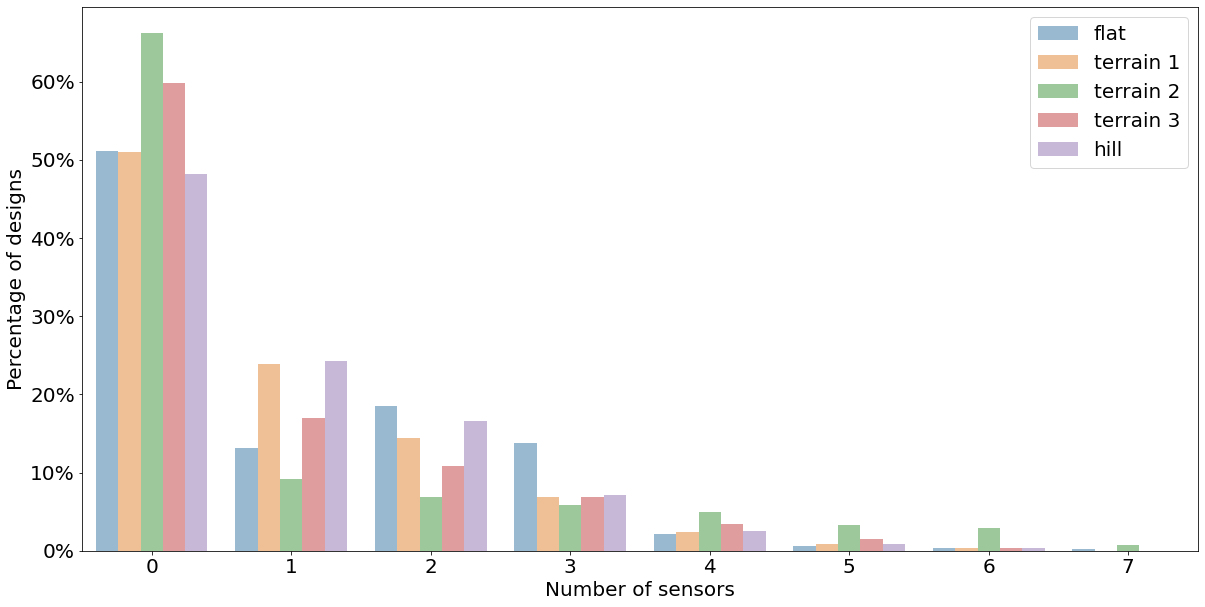

In [46]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['sensors'], normalize='index')
df1 = df.melt(var_name='sensors', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="sensors",y="percentage",hue="environment",hue_order=["flat","terrain 1", "terrain 2", "terrain 3", "hill"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1", "terrain 2", "terrain 3", "hill"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of sensors")
ax.set_ylabel("Percentage of designs")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0.0, '0%'),
  Text(0, 0.05, '5%'),
  Text(0, 0.1, '10%'),
  Text(0, 0.15000000000000002, '15%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.25, '25%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.35000000000000003, '35%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.45, '45%')])

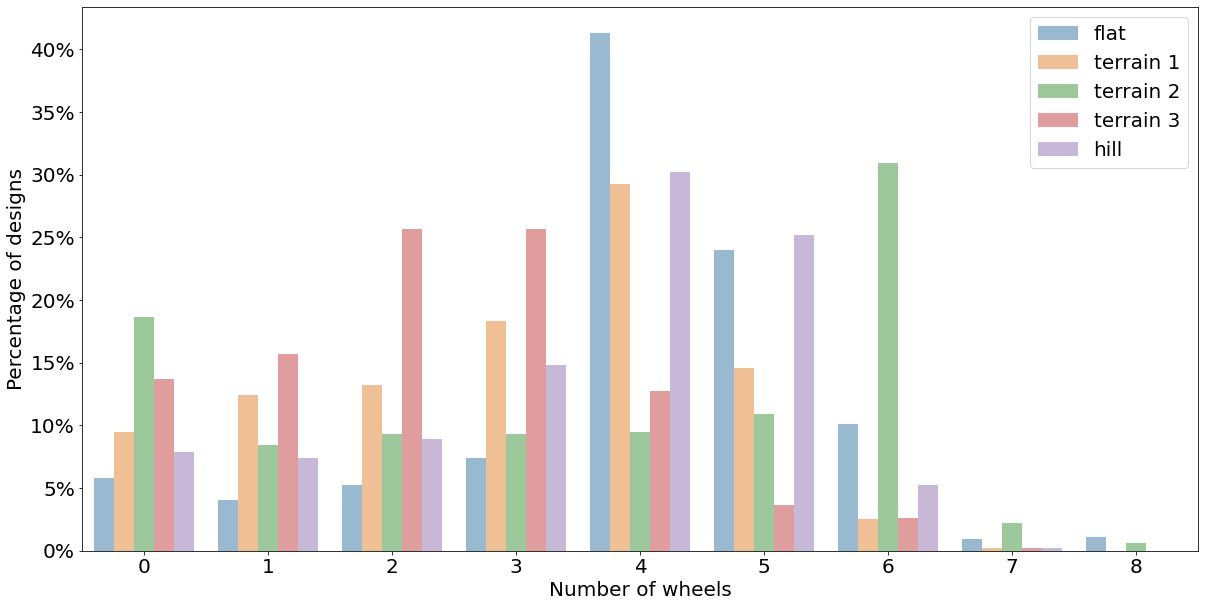

In [48]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['wheels'], normalize='index')
df1 = df.melt(var_name='wheels', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="wheels",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3", "hill"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3", "hill"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of wheels")
ax.set_ylabel("Percentage of designs")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 [Text(0, 0.0, '0%'),
  Text(0, 0.1, '10%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.5, '50%')])

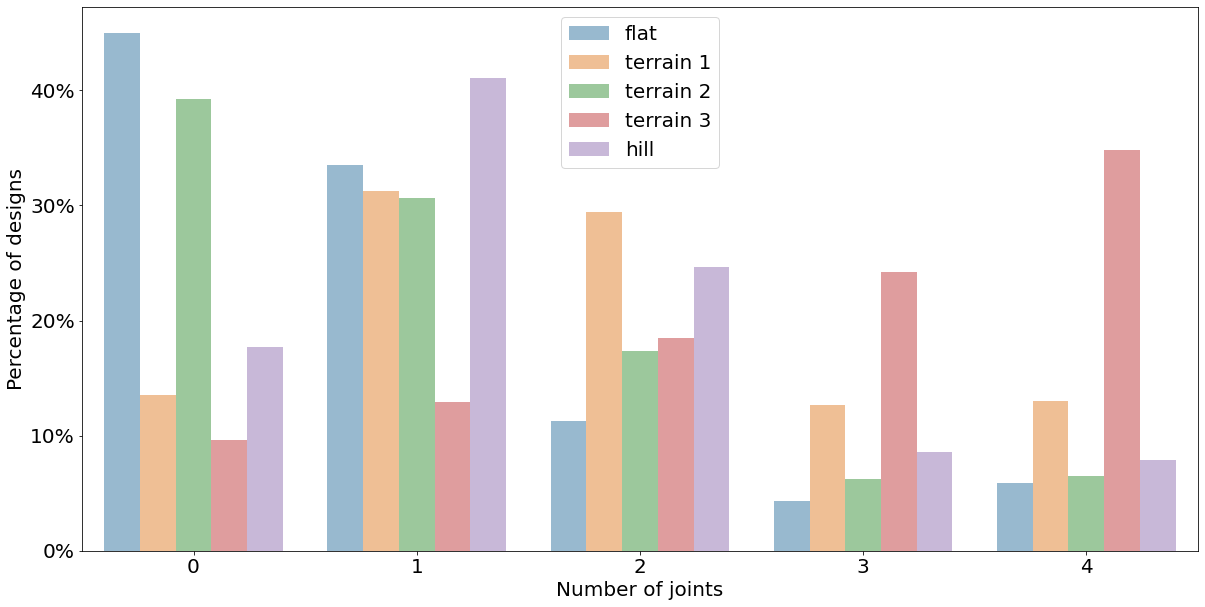

In [49]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['joints'], normalize='index')
df1 = df.melt(var_name='joints', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="joints",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3", "hill"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3", "hill"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of joints")
ax.set_ylabel("Percentage of designs")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.0, '0%'),
  Text(0, 0.1, '10%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.5, '50%'),
  Text(0, 0.6000000000000001, '60%'),
  Text(0, 0.7000000000000001, '70%'),
  Text(0, 0.8, '80%'),
  Text(0, 0.9, '90%')])

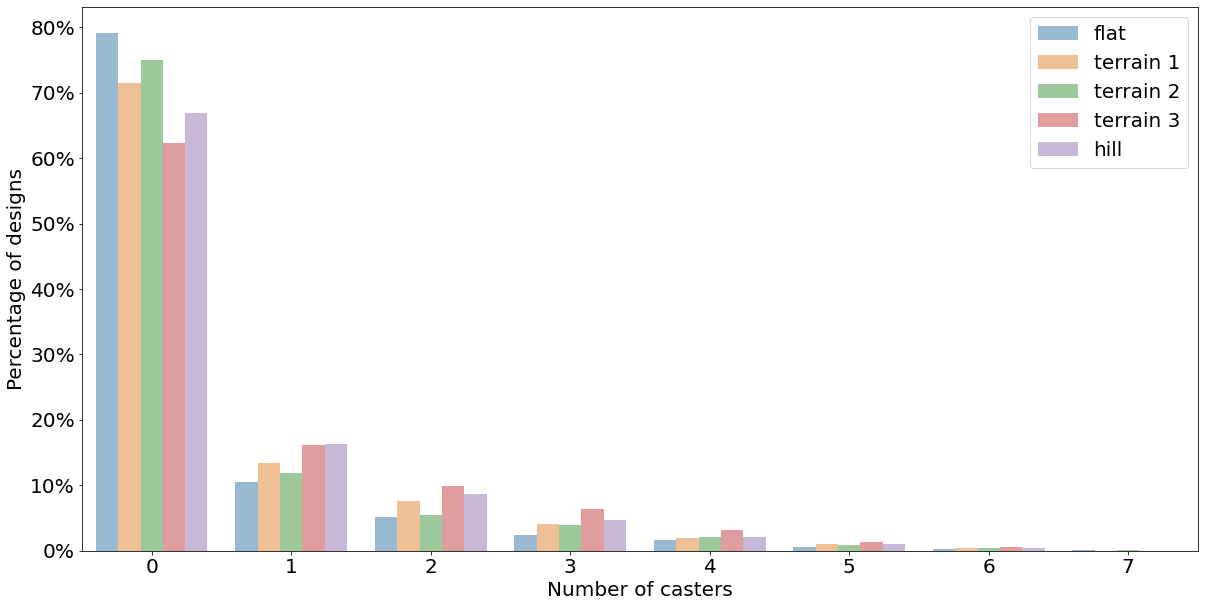

In [51]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['casters'], normalize='index')
df1 = df.melt(var_name='casters', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="casters",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3", "hill"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3", "hill"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of casters")
ax.set_ylabel("Percentage of designs")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

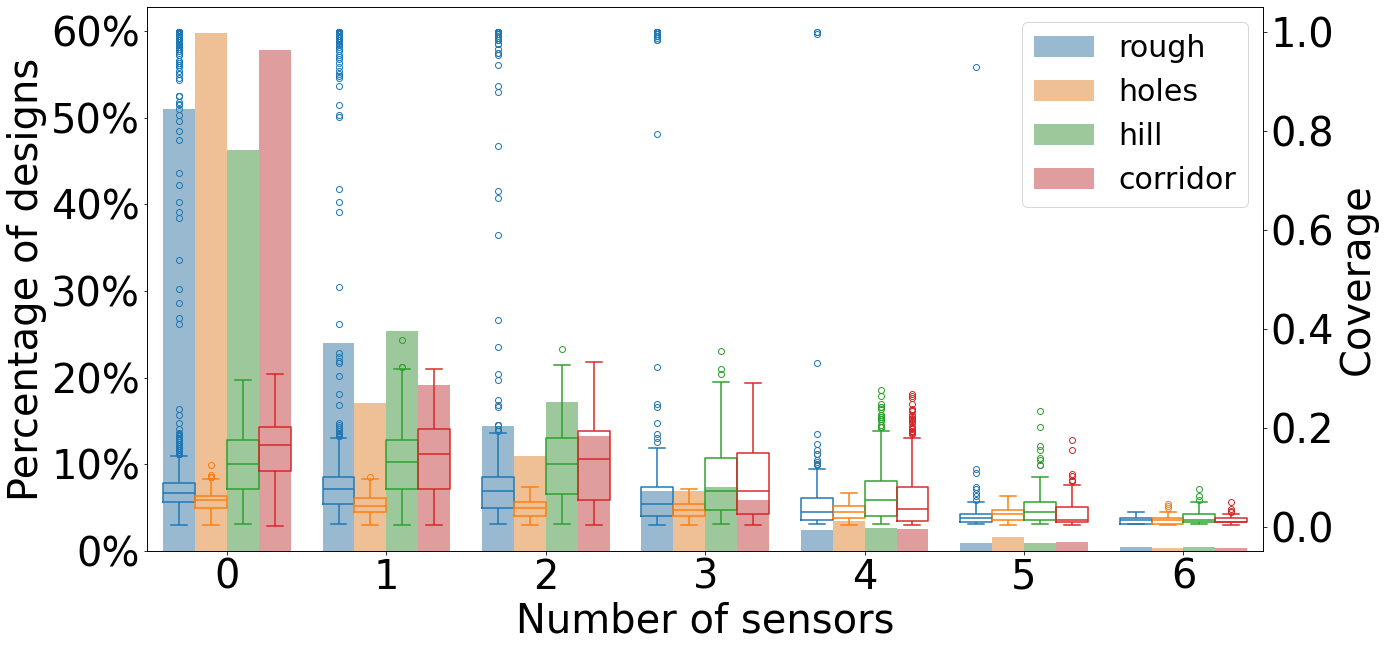

In [941]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['sensors'], normalize='index')
df1 = df.melt(var_name='sensors', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="sensors",y="percentage",hue="environment",hue_order=["rough","holes", "hill", "corridor"],alpha=0.5)
ax.yaxis.label.set_size(40)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["rough","holes","hill", "corridor"],fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.label.set_size(40)
ax.set_xlabel("Number of sensors")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="sensors",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Coverage")
ax.yaxis.label.set_size(40)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=40)
plt.savefig("img_gecco/distribution_sensors_score_nf.png")

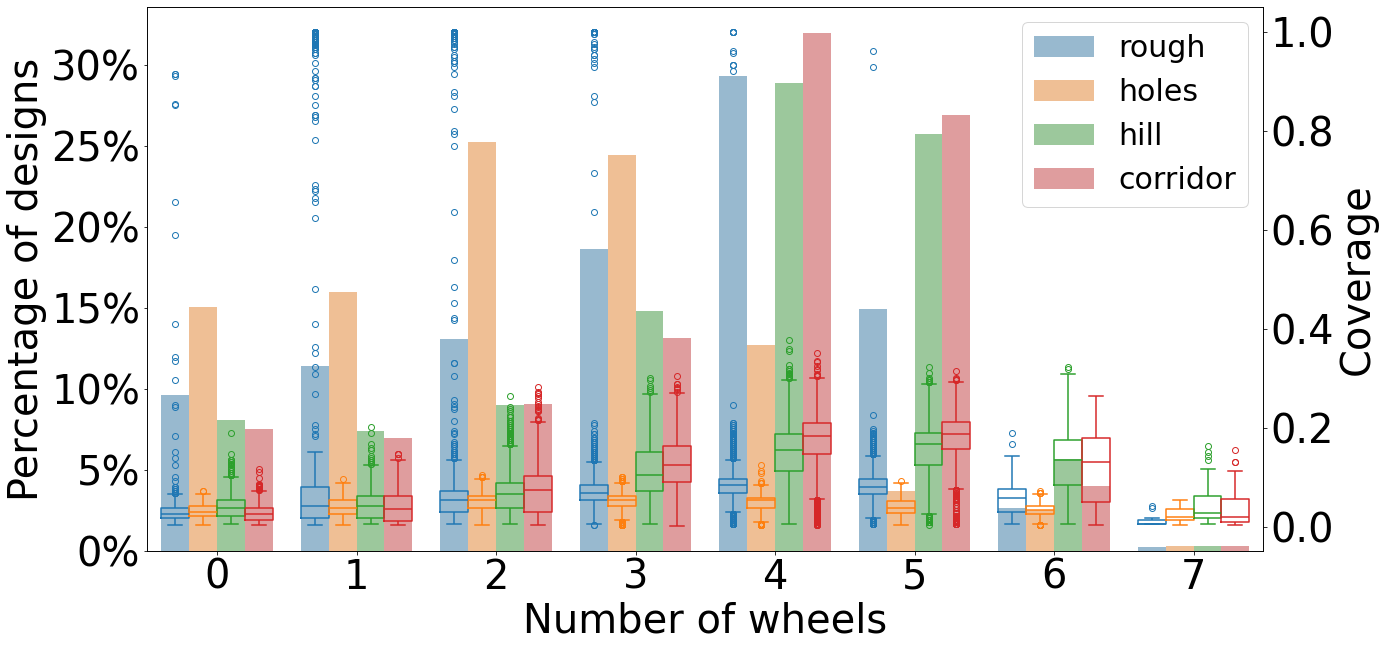

In [22]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['wheels'], normalize='index')
df1 = df.melt(var_name='wheels', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="wheels",y="percentage",hue="environment",hue_order=["rough", "holes", "hill", "corridor"],alpha=0.5)
ax.yaxis.label.set_size(40)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["rough", "holes", "hill", "corridor"],fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.label.set_size(40)
ax.set_xlabel("Number of wheels")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="wheels",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Coverage")
ax.yaxis.label.set_size(40)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=40)
plt.savefig("img_gecco/distribution_wheels_score_nf.png")

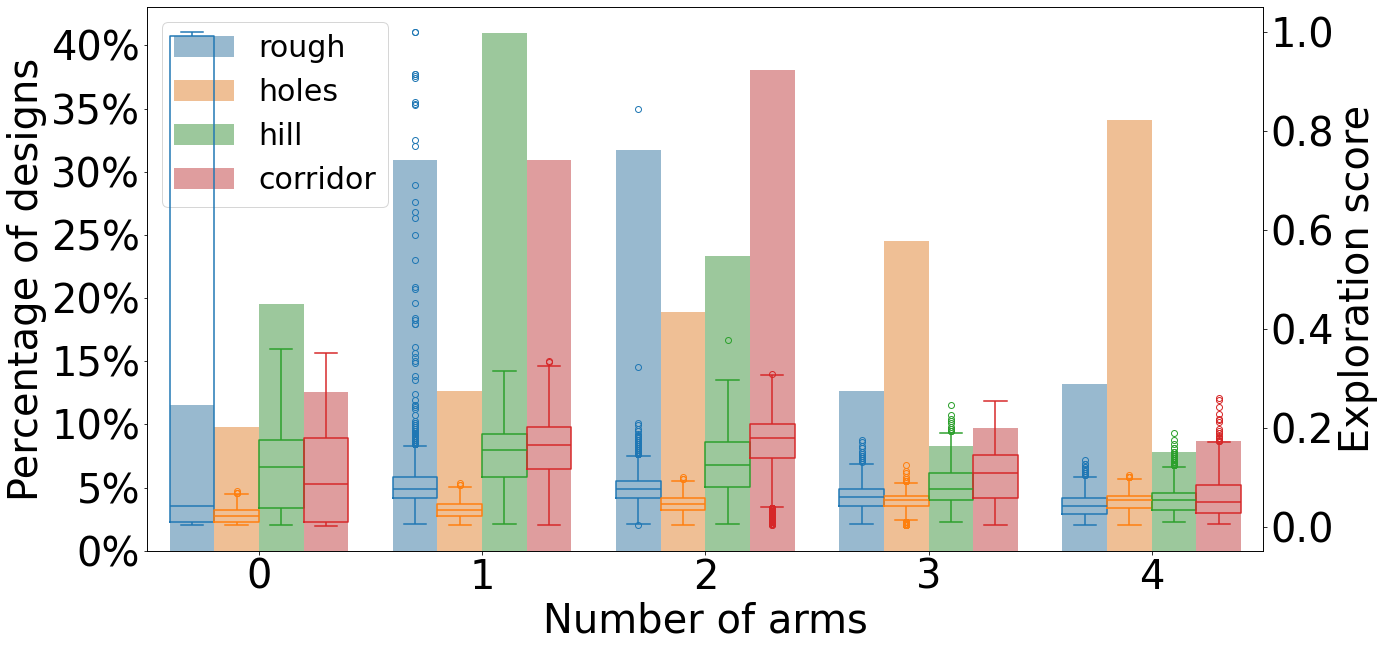

In [23]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['arms'], normalize='index')
df1 = df.melt(var_name='arms', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="arms",y="percentage",hue="environment",hue_order=["rough", "holes", "hill", "corridor"],alpha=0.5)
ax.yaxis.label.set_size(40)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["rough","holes", "hill", "corridor"],fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.label.set_size(40)
ax.set_xlabel("Number of arms")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="arms",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(40)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=40)
plt.savefig("img_gecco/distribution_joints_score_nf.png")

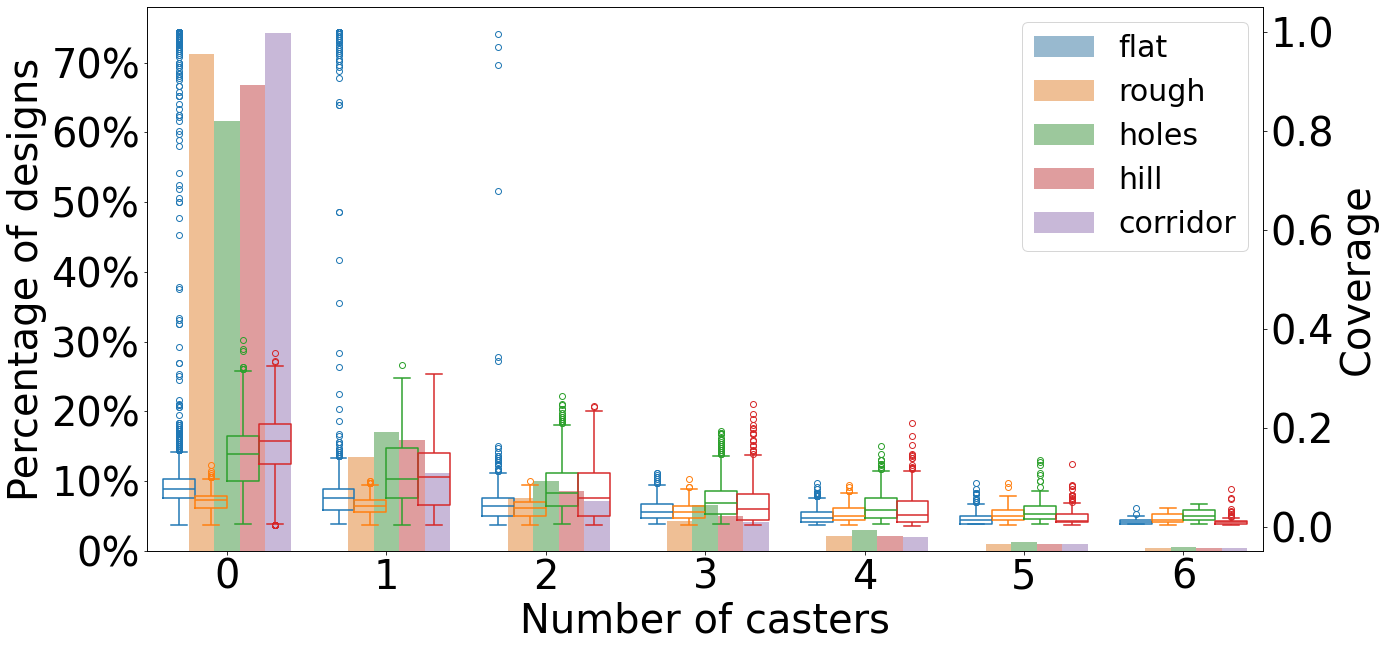

In [24]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['casters'], normalize='index')
df1 = df.melt(var_name='casters', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="casters",y="percentage",hue="environment",hue_order=["flat","rough","holes", "hill", "corridor"],alpha=0.5)
ax.yaxis.label.set_size(40)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","rough", "holes", "hill", "corridor"],fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.label.set_size(40)
ax.set_xlabel("Number of casters")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="casters",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Coverage")
ax.yaxis.label.set_size(40)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=40)
plt.savefig("img_gecco/distribution_castors_score.png")

# High coverage diversity

In [240]:
top_percent = 10
#df_top_flat = desc_data.query('environment == "flat"').sort_values(by=['fitness'], ascending=False)
#df_top_flat = df_top_flat.head(int(len(df_top_flat)*(top_percent/100)))
#print(len(df_top_flat.index))
df_top_terrain_1 = desc_data.query('environment == "rough"').sort_values(by=['fitness'], ascending=False)
df_top_terrain_1 = df_top_terrain_1.head(int(len(df_top_terrain_1)*(top_percent/100)))
print(df_top_terrain_1.describe)
exit
print(len(df_top_terrain_1.index))
#df_top_terrain_2 = desc_data.query('environment == "terrain 2"').sort_values(by=['fitness'], ascending=False)
#df_top_terrain_2 = df_top_terrain_2.head(int(len(df_top_terrain_2)*(top_percent/100)))
#print(len(df_top_terrain_2.index))
df_top_terrain_3 = desc_data.query('environment == "holes"').sort_values(by=['fitness'], ascending=False)
df_top_terrain_3 = df_top_terrain_3.head(int(len(df_top_terrain_1)*(top_percent/100)))
print(len(df_top_terrain_3.index))
df_top_hill = desc_data.query('environment == "hill"').sort_values(by=['fitness'], ascending=False)
df_top_hill = df_top_hill.head(int(len(df_top_hill)*(top_percent/100)))
print(len(df_top_hill.index))
df_top_corridor = desc_data.query('environment == "corridor"').sort_values(by=['fitness'], ascending=False)
df_top_corridor = df_top_corridor.head(int(len(df_top_corridor)*(top_percent/100)))
print(len(df_top_corridor.index))

print( #len(df_top_flat.index) + 
    len(df_top_terrain_1.index) 
      + len(df_top_terrain_3.index) + len(df_top_hill.index)
     + len(df_top_corridor.index))
df_top_desc_data = pd.concat([#df_top_flat, 
                             df_top_terrain_1,
                             df_top_terrain_3, 
                             df_top_hill, 
                             df_top_corridor
                        ]).reset_index(drop=True)
print(len(df_top_desc_data.index))

<bound method NDFrame.describe of         iteration  robot index  discretized number of robots  \
797098        166         6723                          6750   
797699        172         6949                          6950   
797798        173         6963                          7000   
797899        174         7018                          7000   
797996        175         7029                          7050   
...           ...          ...                           ...   
721398        166         8342                          8350   
498498        127         7084                          7100   
613499        100         2839                          2850   
489797         40         1591                          1600   
680499        186         8079                          8100   

        number of individuals  number new inds     width     depth    height  \
797098                   6749                2  0.909091  0.909091  0.909091   
797699                   6960        

/tmp/ipykernel_3357/3666539776.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize=15)
/tmp/ipykernel_3357/3666539776.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize=15)


<Figure size 1440x360 with 0 Axes>

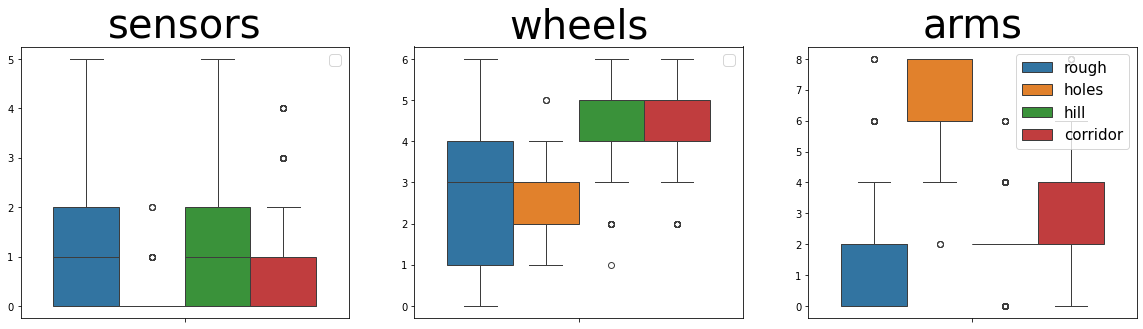

In [233]:
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.figure(figsize=(20,5))
variables = ["sensors", "wheels", "arms"]#,"casters"]
for i, c in enumerate(variables, 1):
    plt.subplot(1,3,i)
    is_legend = False
    if i == 3:
        is_legend = True
    sns.boxplot(y=c, hue="environment", data=df_top_desc_data, legend=is_legend)
    plt.legend(loc='upper right', fontsize=15)
    plt.title(c, fontsize=40)
    plt.ylabel("")
    #plt.suptitle("Top " + str(top_percent) + "%", fontsize=32)
#plt.savefig("img_gecco/high_coverage_diversity_" + str(top_percent) + ".png", bbox_inches='tight')

In [273]:
# Window of 10% ordered by fitness
windows = 10
#df_top_flat = desc_data.query('environment == "flat"').sort_values(by=['fitness'], ascending=False)
#df_top_flat = df_top_flat.head(int(len(df_top_flat)*(top_percent/100)))
#print(len(df_top_flat.index))
print("total size", desc_data.query('environment == "rough"').shape[0])
terrain1_widow_size = int(desc_data.query('environment == "rough"').shape[0] / windows)
terrain3_widow_size = int(desc_data.query('environment == "holes"').shape[0] / windows)
hill_widow_size = int(desc_data.query('environment == "hill"').shape[0] / windows)
corridor_widow_size = int(desc_data.query('environment == "corridor"').shape[0] / windows)
print(terrain1_widow_size)
feats = ["wheels", "sensors", "arms"]
wheels = []
sensors = []
arms = []
for window in range(windows):
    temp_terrain_1 = desc_data.query('environment == "rough"').sort_values(by=['fitness'], ascending=True)[terrain1_widow_size * window : terrain1_widow_size * (window + 1)]
    #temp_terrain_1 = temp_terrain_1[terrain1_widow_size * window : terrain1_widow_size * (window + 1)]
    #temp_terrain_1 = temp_terrain_1.sort_values(by=['fitness'], ascending=True)[1539 : 1715]
    temp_terrain_3 = desc_data.query('environment == "holes"').sort_values(by=['fitness'], ascending=True)[terrain3_widow_size * window : terrain3_widow_size * (window + 1)]
    temp_hill = desc_data.query('environment == "hill"').sort_values(by=['fitness'], ascending=True)[hill_widow_size * window : hill_widow_size * (window + 1)]
    temp_corridor = desc_data.query('environment == "corridor"').sort_values(by=['fitness'], ascending=True)[corridor_widow_size * window : corridor_widow_size * (window + 1)]
    #print("The mean: ", temp_terrain_1["wheels"].mean())#.mean(axis=1))
    #if window == 9:
        #print("start window: ", terrain1_widow_size * window)
        #print("end window: ", terrain1_widow_size * (window + 1))
        #print("temp terrain shape: ", temp_terrain_1.shape[0])
        #print(temp_terrain_1.sort_values(by=['fitness'], ascending=True).describe)
        #print(temp_terrain_1[17145:17149].describe)
        #print(temp_terrain_1.describe)
    wheels.append([temp_terrain_1["wheels"].mean(), temp_terrain_1["wheels"].std(), window, "rough", "wheels"])
    wheels.append([temp_terrain_3["wheels"].mean(), temp_terrain_3["wheels"].std(), window, "holes", "wheels"])
    wheels.append([temp_hill["wheels"].mean(), temp_hill["wheels"].std(), window, "hill", "wheels"])
    wheels.append([temp_corridor["wheels"].mean(), temp_corridor["wheels"].std(), window, "corridor", "wheels"])
    sensors.append([temp_terrain_1["sensors"].mean(), temp_terrain_1["sensors"].std(), window, "rough", "sensors"])
    sensors.append([temp_terrain_3["sensors"].mean(), temp_terrain_3["sensors"].std(), window, "holes", "sensors"])
    sensors.append([temp_hill["sensors"].mean(), temp_hill["sensors"].std(), window, "hill", "sensors"])
    sensors.append([temp_corridor["sensors"].mean(), temp_corridor["sensors"].std(), window, "corridor", "sensors"])
    arms.append([temp_terrain_1["arms"].mean(), temp_terrain_1["arms"].std(), window, "rough", "arms"])
    arms.append([temp_terrain_3["arms"].mean(), temp_terrain_3["arms"].std(), window, "holes", "arms"])
    arms.append([temp_hill["arms"].mean(), temp_hill["arms"].std(), window, "hill", "arms"])
    arms.append([temp_corridor["arms"].mean(), temp_corridor["arms"].std(), window, "corridor", "arms"])

#print(wheels)
wheels = pd.DataFrame(data=wheels, columns=["mean", "std", "window", "environment", "feature"])
sensors = pd.DataFrame(data=sensors, columns=["mean", "std", "window", "environment", "feature"])
arms = pd.DataFrame(data=arms, columns=["mean", "std", "window", "environment", "feature"])
windowed_data = pd.concat([wheels, sensors, arms]).reset_index(drop=True)
#windowed_data = pd.DataFrame(data=windowed_data, columns=["mean", "window", "environment", "feature"])
#print(windowed_data)

total size 17150
1715


/tmp/ipykernel_3357/587051187.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=15)
/tmp/ipykernel_3357/587051187.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=15)


<Figure size 1440x360 with 0 Axes>

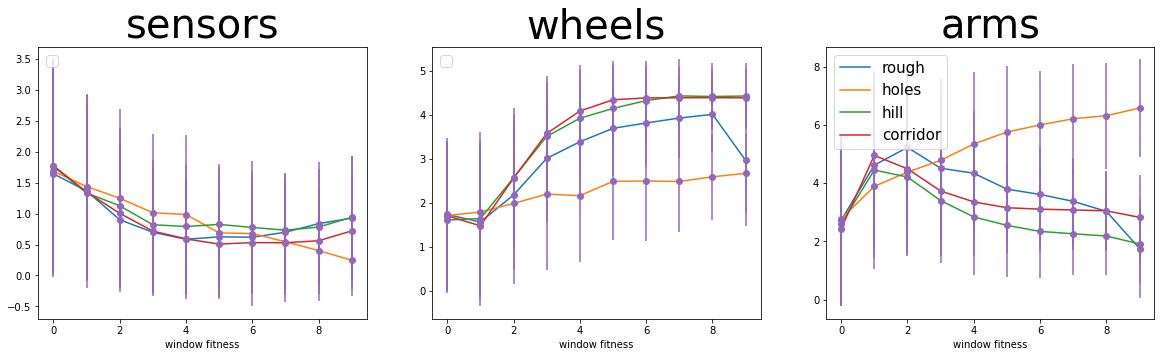

In [282]:
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.figure(figsize=(20,5))
variables = [ "sensors", "wheels", "arms"]#,"casters"]
for i, c in enumerate(variables, 1):
    plt.subplot(1,3,i)
    is_legend = False
    if i == 3:
        is_legend = True
    ax = sns.lineplot(data=windowed_data[windowed_data["feature"] == c], x="window", y="mean", hue="environment", legend=is_legend)
    ax.errorbar(windowed_data[windowed_data["feature"] == c]["window"], windowed_data[windowed_data["feature"] == c]["mean"], yerr= windowed_data[windowed_data["feature"] == c]["std"], fmt='o')
    plt.legend(loc='upper left', fontsize=15)
    plt.title(c, fontsize=40)
    plt.ylabel("")
    plt.xlabel("window fitness")
    #plt.suptitle("Top " + str(top_percent) + "%", fontsize=32)
#plt.savefig("img_gecco/high_coverage_diversity_" + str(top_percent) + ".png", bbox_inches='tight')

In [23]:
# Ranges for diversity
top_percent = 25
df_top_flat = desc_data.query('environment == "flat"').sort_values(by=['fitness'], ascending=False)
df_top_flat = df_top_flat.head(int(len(df_top_flat)*(top_percent/100)))
print(len(df_top_flat.index))
df_top_terrain_1 = desc_data.query('environment == "rough"').sort_values(by=['fitness'], ascending=False)
df_top_terrain_1 = df_top_terrain_1.head(int(len(df_top_terrain_1)*(top_percent/100)))
print(len(df_top_terrain_1.index))
#df_top_terrain_2 = desc_data.query('environment == "terrain 2"').sort_values(by=['fitness'], ascending=False)
#df_top_terrain_2 = df_top_terrain_2.head(int(len(df_top_terrain_2)*(top_percent/100)))
#print(len(df_top_terrain_2.index))
df_top_terrain_3 = desc_data.query('environment == "holes"').sort_values(by=['fitness'], ascending=False)
df_top_terrain_3 = df_top_terrain_3.head(int(len(df_top_terrain_1)*(top_percent/100)))
print(len(df_top_terrain_3.index))
df_top_hill = desc_data.query('environment == "hill"').sort_values(by=['fitness'], ascending=False)
df_top_hill = df_top_hill.head(int(len(df_top_hill)*(top_percent/100)))
print(len(df_top_hill.index))
df_top_corridor = desc_data.query('environment == "corridor"').sort_values(by=['fitness'], ascending=False)
df_top_corridor = df_top_corridor.head(int(len(df_top_corridor)*(top_percent/100)))
print(len(df_top_corridor.index))

print( len(df_top_flat.index) + 
    len(df_top_terrain_1.index) 
      + len(df_top_terrain_3.index) + len(df_top_hill.index)
     + len(df_top_corridor.index))
df_top_desc_data = pd.concat([df_top_flat, 
    df_top_terrain_1,
                             df_top_terrain_3, df_top_hill, 
                             df_top_corridor]).reset_index(drop=True)
print(len(df_top_desc_data.index))

4167
4287
1071
3701
4162
17388
17388


# Diversity UMAP


In [34]:
import umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP()
     #a=None, angular_rp_forest=False, b=None,
     #force_approximation_algorithm=False, init='spectral', learning_rate=1.2,
     #local_connectivity=1.0, low_memory=False, metric='euclidean',
     #metric_kwds=None, min_dist=2.0, n_components=2, n_epochs=None,
     #n_neighbors=10, negative_sample_rate=5, output_metric='euclidean',
     #output_metric_kwds=None, random_state=42, repulsion_strength=2.0,
     #set_op_mix_ratio=0.5, spread=2.0, target_metric='categorical',
     #target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     #transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)
umap_desc_data = desc_data[
    [
        "width",
        "depth",
        "height",
        "voxels",
        "wheels",
        "sensors",
        "arms",
        "casters",
        #"norm",
        #"skeleton norm",
        #"components norm"
    ]
].values
scaled_umap_desc_data = StandardScaler().fit_transform(umap_desc_data)
embedding = reducer.fit_transform(scaled_umap_desc_data)
embedding.shape
#desc_data.environment.value_counts()

#sns.boxplot(desc_data.environment, desc_data.fitness)
#fig = plt.gcf()
#fig.set_size_inches(20,10)
#ax = plt.scatter(
#    embedding[:, 0],
#    embedding[:, 1],
#    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the Penguin dataset', fontsize=24);
#plt.yticks(fontsize=20)

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


(64800, 2)

In [35]:
embs = pd.DataFrame(embedding, columns=["x", "y"])
embs = pd.concat([embs.reset_index(drop=True),
                  desc_data.environment.reset_index(drop=True), 
                  desc_data.fitness.reset_index(drop=True),
                  desc_data.replicate.reset_index(drop=True),
                  desc_data.replicate_index.reset_index(drop=True)
                 ], axis=1).reset_index(drop=True)#, desc_data.fitness], axis=1)

embs.environment = pd.Categorical(embs.environment,
                                categories=[
                                    #"terrain 1", "corridor", "terrain 3","hill", "flat"
                                    #"corridor", "terrain 3","hill", "flat", "terrain 1"
                                    #"corridor", "terrain 1","hill", "flat", "terrain 3"
                                    #"terrain 1", "corridor", "terrain 3", "flat","hill"                                    
                                    #"terrain 1", "terrain 3","hill", "flat", "corridor"
                                    #"flat", "hill", "terrain 1", "terrain 3", "corridor"
                                    "rough", "holes","hill", "corridor"                                    
                                ],
                                ordered=True)


#replicate_percent = 1
#ems_temp = pd.DataFrame()
#for envs in embs.environment.unique():
#    for repli in embs[embs["environment"] == envs].replicate.unique():
#        repli_subset = embs[embs["replicate"] == repli].sort_values(by=['replicate_index'], ascending=True)
#        repli_subset = repli_subset.head(int(len(repli_subset)*(replicate_percent/100)))
#        ems_temp = pd.concat([ems_temp, repli_subset.reset_index(drop=True)])
#embs = ems_temp

embs = embs.sort_values("environment")

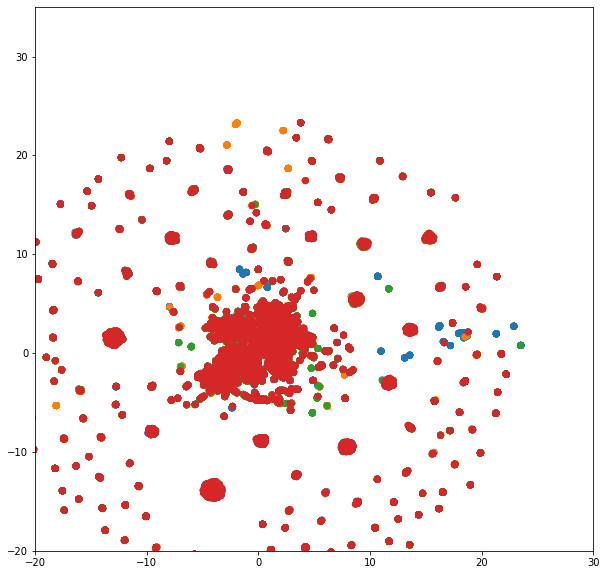

In [36]:
# First percent of generated robots
percents = [1, 2, 5, 10, 25, 50, 75, 100]
for replicate_percent in percents:
    embs_temp = pd.DataFrame()
    for envs in embs.environment.unique():
        for repli in embs[embs["environment"] == envs].replicate.unique():
            repli_subset = embs[embs["replicate"] == repli].sort_values(by=['replicate_index'], ascending=True)
            repli_subset = repli_subset.head(int(len(repli_subset)*(replicate_percent/100)))
            embs_temp = pd.concat([embs_temp, repli_subset.reset_index(drop=True)])

    embs_temp = embs_temp.sort_values("environment")

    fig = plt.gcf()
    fig.set_size_inches(10,10)
    ax = plt.scatter(
        embs_temp.x,
        embs_temp.y,
        c=[sns.color_palette()[x] for x in embs_temp.environment.map(
            #{"flat":0, "terrain 1":1, "terrain 3":2, "hill":3, "corridor": 4}        
            {"rough":0, "holes":1, "hill":2, "corridor": 3}        
        )],)
    plt.gca().set_xlim([-20, 30])
    plt.gca().set_ylim([-20, 35])

    plt.ylim(-20, 35)
    plt.xlim(-20,30)
    #plt.title('UMAP projection of the descriptors dataset', fontsize=24)
    plt.savefig("img_gecco/umap_all_" + str(replicate_percent) + "_nf.png", bbox_inches='tight')
# "flat":0 blue
# "terrain 1":1 orange
# "terrain 3":2 gree
# "hill":3 red
# "corridor": purple

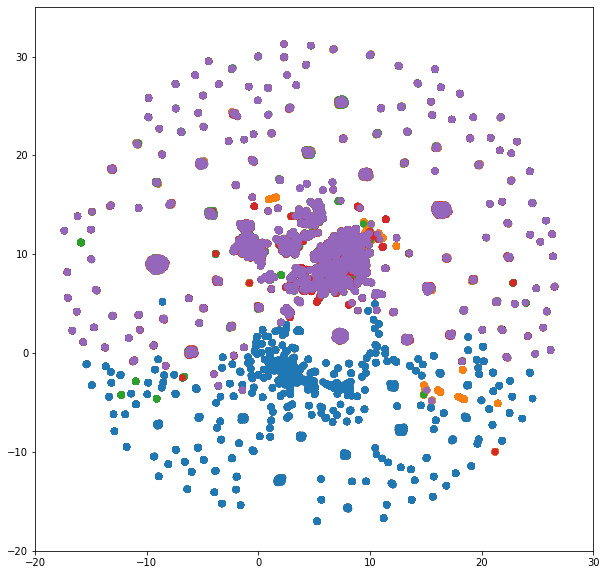

In [852]:
# All generated robots - OLD name - use next cell for new names and no flat terrain
cats = [
    ["terrain 1", "corridor", "terrain 3","hill", "flat"],
    ["corridor", "terrain 3","hill", "flat", "terrain 1"],
    ["corridor", "terrain 1","hill", "flat", "terrain 3"],
    ["terrain 1", "corridor", "terrain 3", "flat","hill"],
    ["terrain 1", "terrain 3","hill", "flat", "corridor"],
    ["terrain 1", "terrain 3","hill", "flat", "corridor"],
]
colours = [
    [{"flat":0, "terrain 1":7, "terrain 3":7, "hill":7, "corridor": 7}],
    [{"flat":7, "terrain 1":1, "terrain 3":7, "hill":7, "corridor": 7}],
    [{"flat":7, "terrain 1":7, "terrain 3":2, "hill":7, "corridor": 7}],
    [{"flat":7, "terrain 1":7, "terrain 3":7, "hill":3, "corridor": 7}],
    [{"flat":7, "terrain 1":7, "terrain 3":7, "hill":7, "corridor": 4}],
    [{"flat":0, "terrain 1":1, "terrain 3":2, "hill":3, "corridor": 4}]
]
files = [
    "img_gecco/umap_flat.png",
    "img_gecco/umap_terrain1.png",
    "img_gecco/umap_terrain3.png",
    "img_gecco/umap_hill.png",
    "img_gecco/umap_corridor.png",
    "img_gecco/umap_all.png"
]

for idx, c in enumerate(cats):
    embs = pd.DataFrame(embedding, columns=["x", "y"])
    embs = pd.concat([embs.reset_index(drop=True),
                      desc_data.environment.reset_index(drop=True), 
                      desc_data.fitness.reset_index(drop=True),
                      desc_data.replicate.reset_index(drop=True),
                      desc_data.replicate_index.reset_index(drop=True)
                     ], axis=1).reset_index(drop=True)#, desc_data.fitness], axis=1)

    embs.environment = pd.Categorical(embs.environment,
                                    categories=[
                                        cats[idx][0],
                                        cats[idx][1],
                                        cats[idx][2],
                                        cats[idx][3],
                                        cats[idx][4]
                                    ],
                                    ordered=True)


    #replicate_percent = 1
    #ems_temp = pd.DataFrame()
    #for envs in embs.environment.unique():
    #    for repli in embs[embs["environment"] == envs].replicate.unique():
    #        repli_subset = embs[embs["replicate"] == repli].sort_values(by=['replicate_index'], ascending=True)
    #        repli_subset = repli_subset.head(int(len(repli_subset)*(replicate_percent/100)))
    #        ems_temp = pd.concat([ems_temp, repli_subset.reset_index(drop=True)])
    #embs = ems_temp

    embs = embs.sort_values("environment")


    fig = plt.gcf()
    fig.set_size_inches(10,10)
    ax = plt.scatter(
        embs.x,
        embs.y,
        c=[sns.color_palette()[x] for x in embs.environment.map(
            colours[idx][0]
        )],)
    plt.gca().set_xlim([-20, 30])
    plt.gca().set_ylim([-20, 35])
    #plt.gca().set_aspect('equal', 'datalim')
    plt.ylim(-20, 35)
    plt.xlim(-20,30)
    #plt.legend()
    #plt.title('UMAP projection of the descriptors dataset', fontsize=24)
    plt.savefig(files[idx], bbox_inches='tight')   
# "flat":0 blue
# "terrain 1":1 orange
# "terrain 3":2 gree
# "hill":3 red
# "corridor": purple

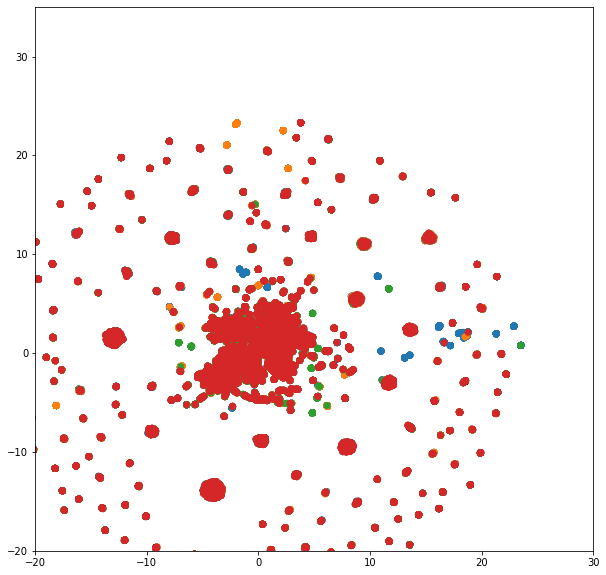

In [37]:
# All generated robots - new name - no flat
cats = [
    ["corridor", "holes","hill", "rough"],
    ["corridor", "rough","hill", "holes"],    
    ["rough", "corridor", "holes","hill"],
    ["rough", "holes","hill", "corridor"],
    ["rough", "holes","hill", "corridor"],
]
colours = [
    [{"rough":0, "holes":7, "hill":7, "corridor": 7}],
    [{"rough":7, "holes":1, "hill":7, "corridor": 7}],
    [{"rough":7, "holes":7, "hill":2, "corridor": 7}],
    [{"rough":7, "holes":7, "hill":7, "corridor": 3}],
    [{"rough":0, "holes":1, "hill":2, "corridor": 3}]
]
files = [
    "img_gecco/umap_terrain1_nf.png",
    "img_gecco/umap_terrain3_nf.png",
    "img_gecco/umap_hill_nf.png",
    "img_gecco/umap_corridor_nf.png",
    "img_gecco/umap_all_nf.png"
]

for idx, c in enumerate(cats):
    embs = pd.DataFrame(embedding, columns=["x", "y"])
    embs = pd.concat([embs.reset_index(drop=True),
                      desc_data.environment.reset_index(drop=True), 
                      desc_data.fitness.reset_index(drop=True),
                      desc_data.replicate.reset_index(drop=True),
                      desc_data.replicate_index.reset_index(drop=True)
                     ], axis=1).reset_index(drop=True)#, desc_data.fitness], axis=1)

    embs.environment = pd.Categorical(embs.environment,
                                    categories=[
                                        cats[idx][0],
                                        cats[idx][1],
                                        cats[idx][2],
                                        cats[idx][3],
                          #              cats[idx][4]
                                    ],
                                    ordered=True)


    #replicate_percent = 1
    #ems_temp = pd.DataFrame()
    #for envs in embs.environment.unique():
    #    for repli in embs[embs["environment"] == envs].replicate.unique():
    #        repli_subset = embs[embs["replicate"] == repli].sort_values(by=['replicate_index'], ascending=True)
    #        repli_subset = repli_subset.head(int(len(repli_subset)*(replicate_percent/100)))
    #        ems_temp = pd.concat([ems_temp, repli_subset.reset_index(drop=True)])
    #embs = ems_temp

    embs = embs.sort_values("environment")


    fig = plt.gcf()
    fig.set_size_inches(10,10)
    ax = plt.scatter(
        embs.x,
        embs.y,
        c=[sns.color_palette()[x] for x in embs.environment.map(
            colours[idx][0]
        )],)
    plt.gca().set_xlim([-20, 30])
    plt.gca().set_ylim([-20, 35])
    #plt.gca().set_aspect('equal', 'datalim')
    plt.ylim(-20, 35)
    plt.xlim(-20,30)
    #plt.legend()
    #plt.title('UMAP projection of the descriptors dataset', fontsize=24)
    plt.savefig(files[idx], bbox_inches='tight')   
# "flat":0 blue
# "terrain 1":1 orange
# "terrain 3":2 gree
# "hill":3 red
# "corridor": purple

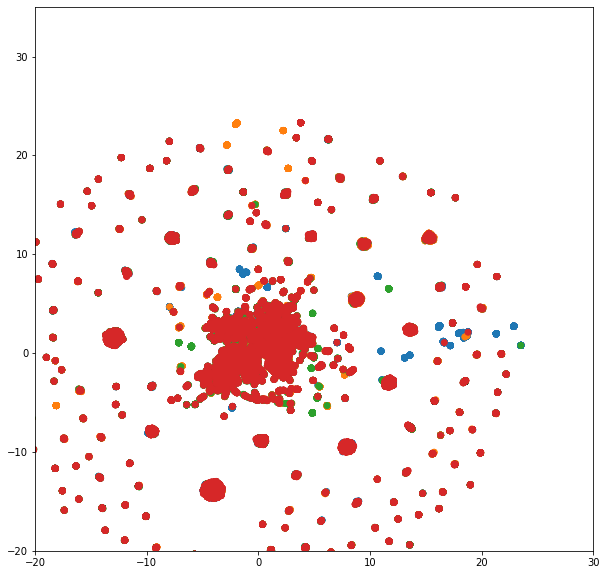

In [38]:
# Top percent of robots ordered by fitness
percents = [5, 10, 15, 20, 25, 30, 50, 75, 100]
for replicate_percent in percents:
    embs_temp = pd.DataFrame()
    for envs in embs.environment.unique():
        for repli in embs[embs["environment"] == envs].replicate.unique():
            repli_subset = embs[embs["replicate"] == repli].sort_values(by=['fitness'], ascending=False)
            repli_subset = repli_subset.head(int(len(repli_subset)*(replicate_percent/100)))
            embs_temp = pd.concat([embs_temp, repli_subset.reset_index(drop=True)])

    embs_temp = embs_temp.sort_values("environment")

    fig = plt.gcf()
    fig.set_size_inches(10,10)
    ax = plt.scatter(
        embs_temp.x,
        embs_temp.y,
        c=[sns.color_palette()[x] for x in embs_temp.environment.map(
            #{"flat":0, "terrain 1":1, "terrain 3":2, "hill":3, "corridor": 4}        
            {"rough":0, "holes":1, "hill":2, "corridor": 3}
        )],)
    plt.gca().set_xlim([-20, 30])
    plt.gca().set_ylim([-20, 35])

    plt.ylim(-20, 35)
    plt.xlim(-20,30)
    #plt.title('UMAP projection of the descriptors dataset', fontsize=24)
    plt.savefig("img_gecco/umap_top_fitness_" + str(replicate_percent) + "_nf.png", bbox_inches='tight')
# "flat":0 blue
# "terrain 1":1 orange
# "terrain 3":2 gree
# "hill":3 red
# "corridor": purple

# Diversity full components

In [6]:
# rough
parent_descs_full = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    parent_ids_full = medf.load_parent_pool(mehk_t1_folder + "/" + folder + "/parent_pool.csv")
    descriptors_full = medf.load_component_descriptor(mehk_t1_folder + "/" + folder + "/morph_descriptor.csv")
    parent_descs_full += filter_to_parent_pool(descriptors_full, parent_ids_full)

par_desc_data2_full = np.array(parent_descs_full)
#par_desc_data2["environment"] = "rough"

meim_env_pressure_13_0_15-7-30-600-3387006090
meim_env_pressure_18_0_0-2-30-503-2667642410
meim_env_pressure_16_0_13-14-53-3493-2600027928
meim_env_pressure_16_0_22-30-27-7020-3767108756
meim_env_pressure_14_0_20-49-57-7984-2503842223
meim_env_pressure_14_0_19-49-25-5042-3843521264
meim_env_pressure_17_0_11-10-57-7088-3696739141
meim_env_pressure_13_0_22-46-5-5170-2720413242
meim_env_pressure_22_0_15-27-57-7572-2826361338
meim_env_pressure_17_0_21-31-49-9173-2760130346
meim_env_pressure_23_0_14-1-58-8688-4238158050
meim_env_pressure_13_0_22-35-11-1148-3327391022
meim_env_pressure_16_0_13-14-51-1511-1972150482
meim_env_pressure_16_0_13-14-48-8414-1167938810
meim_env_pressure_13_0_12-18-16-6528-443972455
meim_env_pressure_14_0_13-6-46-6105-4077587845
meim_env_pressure_17_0_21-56-52-2077-329315061
meim_env_pressure_23_0_14-1-56-6759-1204360480
meim_env_pressure_13_0_15-7-30-387-3282607704
meim_env_pressure_13_0_12-18-18-8515-2769036070
meim_env_pressure_16_0_23-19-34-4035-1661290298


In [7]:
# holes
parent_descs_full = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    parent_ids_full = medf.load_parent_pool(mehk_t3_folder + "/" + folder + "/parent_pool.csv")
    descriptors_full = medf.load_component_descriptor(mehk_t3_folder + "/" + folder + "/morph_descriptor.csv")
    parent_descs_full += filter_to_parent_pool(descriptors_full, parent_ids_full)

par_desc_data3_full = np.array(parent_descs_full)
#par_desc_data2["environment"] = "rough"

meim_env_pressure_13_0_16-2-45-5131-3133728638
meim_env_pressure_17_0_10-56-10-87-3224168498
meim_env_pressure_13_0_12-19-56-6532-918908569
meim_env_pressure_14_0_11-41-14-4036-2674865236
meim_env_pressure_13_0_12-17-53-3485-1947333064
meim_env_pressure_17_0_10-56-16-6463-2113247102
meim_env_pressure_17_0_10-56-17-7980-3009128605
meim_env_pressure_17_0_0-18-21-1124-2569587422
meim_env_pressure_22_0_9-35-16-6027-1318951971
meim_env_pressure_17_0_0-7-37-7190-1547867500
meim_env_pressure_17_0_11-9-54-4104-132613278
meim_env_pressure_16_0_23-34-30-103-3212252362
meim_env_pressure_13_0_22-32-29-9168-3943053088
meim_env_pressure_17_0_0-22-3-3088-1161040689
meim_env_pressure_14_0_11-18-38-8163-931723730
meim_env_pressure_13_0_12-19-53-3623-1568860632
meim_env_pressure_16_0_23-44-23-3103-1579083871
meim_env_pressure_22_0_10-33-58-8126-1846744588
meim_env_pressure_14_0_10-58-32-2086-3419700486
meim_env_pressure_14_0_10-58-35-5025-3463452074


In [8]:
# hill
parent_descs_full = []
for folder in os.listdir(mehk_hill_folder):
    print(folder)
    parent_ids_full = medf.load_parent_pool(mehk_hill_folder + "/" + folder + "/parent_pool.csv")
    descriptors_full = medf.load_component_descriptor(mehk_hill_folder + "/" + folder + "/morph_descriptor.csv")
    parent_descs_full += filter_to_parent_pool(descriptors_full, parent_ids_full)

par_desc_data4_full = np.array(parent_descs_full)
#par_desc_data2["environment"] = "rough"

meim_env_pressure_14_0_21-8-46-6171-1088200090
meim_env_pressure_14_0_2-2-28-8104-2843173586
meim_env_pressure_14_0_2-14-2-2117-1470736344
meim_env_pressure_22_0_8-24-30-99-1028918243
meim_env_pressure_18_0_8-17-10-52-3916310037
meim_env_pressure_14_0_7-53-47-7050-2755637213
meim_env_pressure_16_0_13-14-32-2584-2438116876
meim_env_pressure_16_0_13-14-35-5514-983190446
meim_env_pressure_14_0_22-14-52-2165-1216259645
meim_env_pressure_13_0_23-16-24-4120-694514269
meim_env_pressure_15_0_1-31-20-42-1785020082
meim_env_pressure_14_0_8-23-53-3032-3104897786
meim_env_pressure_16_0_13-14-26-6549-3754694820
meim_env_pressure_16_0_13-14-38-8600-786286838
meim_env_pressure_15_0_1-26-16-6010-2152763288
meim_env_pressure_18_0_9-3-41-1106-2378742474
meim_env_pressure_16_0_13-14-29-9506-2279773335
meim_env_pressure_22_0_9-16-18-8115-2309876279
meim_env_pressure_13_0_22-57-6-6137-1464868196
meim_env_pressure_18_0_3-7-50-99-3949370651


In [9]:
# corridor
parent_descs_full = []
for folder in os.listdir(mehk_corridor_folder):
    print(folder)
    parent_ids_full = medf.load_parent_pool(mehk_corridor_folder + "/" + folder + "/parent_pool.csv")
    descriptors_full = medf.load_component_descriptor(mehk_corridor_folder + "/" + folder + "/morph_descriptor.csv")
    parent_descs_full += filter_to_parent_pool(descriptors_full, parent_ids_full)

par_desc_data5_full = np.array(parent_descs_full)
#par_desc_data2["environment"] = "rough"

meim_env_pressure_22_0_23-46-22-2477-1358352833
meim_env_pressure_21_0_15-4-4-4149-3471933860
meim_env_pressure_21_0_23-35-48-8148-2605499614
meim_env_pressure_21_0_13-15-17-7593-2810911125
meim_env_pressure_21_0_22-52-48-8054-3963555527
meim_env_pressure_22_0_20-31-57-7798-3917953758
meim_env_pressure_22_0_20-17-26-6568-2358104570
meim_env_pressure_21_0_13-15-23-3568-4151222338
meim_env_pressure_22_0_20-9-26-6395-3115374187
meim_env_pressure_21_0_22-58-8-8047-3161988788
meim_env_pressure_21_0_13-15-9-9527-992733859
meim_env_pressure_21_0_23-49-31-1050-4131365314
meim_env_pressure_21_0_13-14-59-9455-3613682677
meim_env_pressure_21_0_13-15-17-7548-2705840735
meim_env_pressure_22_0_8-13-46-6031-2692149765
meim_env_pressure_22_0_7-2-33-3151-2629363064
meim_env_pressure_22_0_1-5-49-9073-2631536415
meim_env_pressure_21_0_13-15-20-595-2283069330
meim_env_pressure_21_0_13-15-13-3453-3496313023
meim_env_pressure_21_0_17-50-56-6013-19038999
meim_env_pressure_21_0_21-44-40-1-3754474438
meim_env_

In [40]:
# join full descriptors
print(par_desc_data2_full.shape)
print(par_desc_data3_full.shape)
print(par_desc_data4_full.shape)
print(par_desc_data5_full.shape)
env_label_rough = ["rough"] * par_desc_data2_full.shape[0]
env_label_holes = ["holes"] * par_desc_data3_full.shape[0]
env_label_hill = ["hill"] * par_desc_data4_full.shape[0]
env_label_corridor = ["corridor"] * par_desc_data4_full.shape[0]
env_label_full_desc = env_label_rough + env_label_holes + env_label_hill + env_label_corridor
print(len(env_label_full_desc))
full_desc = np.vstack((par_desc_data2_full, par_desc_data3_full, par_desc_data4_full))[:, 1:1337]

(435900, 1338)
(424700, 1338)
(381300, 1338)
(408100, 1338)
1623200


In [42]:
from scipy.sparse import csr_matrix
full_desc_matrix = csr_matrix(full_desc)
full_desc_matrix
#type(full_desc)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4967347 stored elements and shape (1241900, 1336)>

In [ ]:
import umap
mapper = umap.UMAP(metric='hellinger', random_state=42).fit(full_desc_matrix)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
umap.plot.points(mapper, labels=env_label_full_desc)

In [ ]:
%%time
lil_matrix_rows = []
lil_matrix_data = []
lil_matrix_rows.append([prime_to_column[p] for p in prime_factors])
lil_matrix_data.append([1] * len(prime_factors))
for n in range(full_desc.shape[0]):
    prime_factors = sympy.primefactors(n)
    lil_matrix_rows.append([prime_to_column[p] for p in prime_factors])
    lil_matrix_data.append([1] * len(prime_factors))

In [ ]:
# train umap model
import umap
from sklearn.preprocessing import StandardScaler
reducer_full = umap.UMAP(low_memory=True)
scaled_umap_desc_data_full = StandardScaler().fit_transform(
    np.vstack((par_desc_data2_full, 
               par_desc_data3_full,
               par_desc_data4_full,
               par_desc_data5_full))[:, 1:1337])
embedding_full = reducer_full.fit_transform(scaled_umap_desc_data_full)
embedding_full.shape


# Jensen Shannon

In [77]:
from copulas.multivariate import GaussianMultivariate

In [76]:
data_dist = desc_data[desc_data["environment"] == "flat"][
    [
        "width",
        "depth",
        "height",
        "voxels",
        "wheels",
        "sensors",
        "arms",
        "casters"
    ]
].values
dist = GaussianMultivariate()
dist.fit(data_dist)

NameError: name 'GaussianMultivariate' is not defined

In [911]:
object_methods = [method_name for method_name in dir(dist)
                  if callable(getattr(dist, method_name))]
object_methods

['__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_fit_column',
 '_fit_columns',
 '_fit_with_fallback_distribution',
 '_get_conditional_distribution',
 '_get_correlation',
 '_get_distribution_for_column',
 '_get_normal_samples',
 '_transform_to_normal',
 '_validate_input',
 'cdf',
 'check_fit',
 'cumulative_distribution',
 'distribution',
 'fit',
 'from_dict',
 'load',
 'log_probability_density',
 'pdf',
 'probability_density',
 'sample',
 'save',
 'set_random_state',
 'to_dict']

In [930]:
#dist.pdf(pd.DataFrame([0, 0,0 ,0,0,0,100]))
import scipy; print(scipy.__version__)

1.8.0


In [928]:
#import numpy as np
#from scipy import stats
rng = np.random.default_rng()
dist = stats.nbinom
shapes = (5, 0.5)
data = dist.rvs(*shapes, size=1000, random_state=rng)
bounds = [(0, 30), (0, 1)]
res = stats.fit(dist, data, bounds)

AttributeError: module 'scipy.stats' has no attribute 'fit'

# Chassis diversity

In [29]:
desc_data = pd.concat([par_desc_data1,par_desc_data2,par_desc_data3,par_desc_data4]).reset_index(drop=True)
desc_data = pd.merge(desc_data,fit_data,how="left",on=["iteration","robot index","replicate","discretized number of robots","number of individuals","number new inds","environment"])
desc_data = desc_data.drop_duplicates(subset=['robot index','replicate'])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

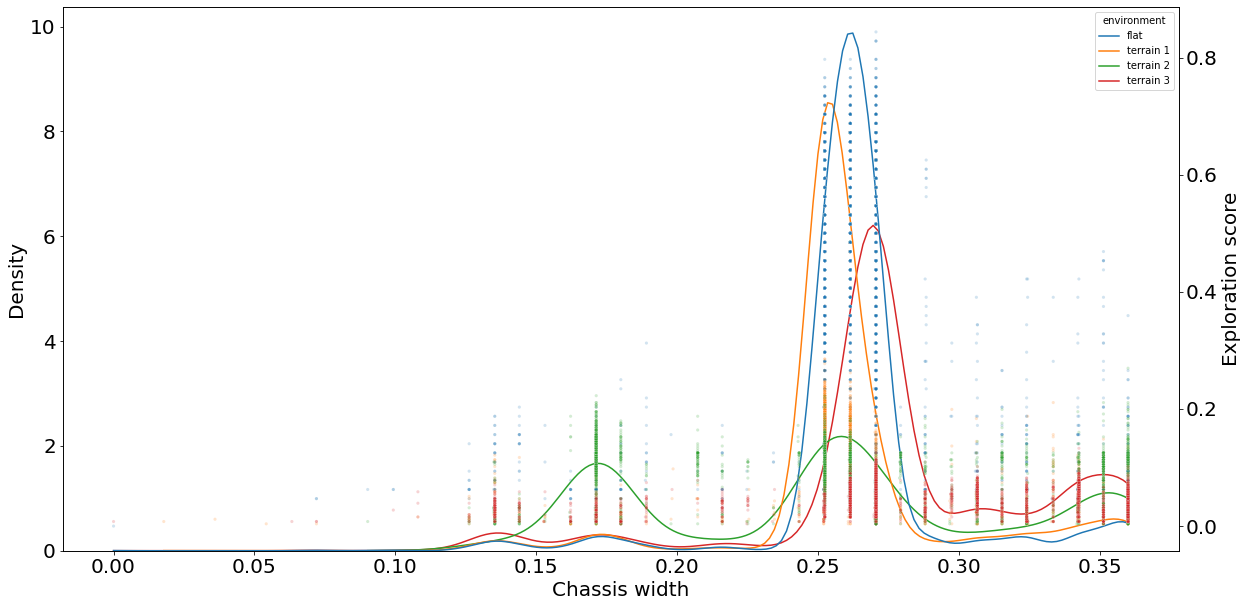

In [30]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="width",hue="environment",cut=0,hue_order=["flat","terrain 1","terrain 2","terrain 3"])
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis width")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="width",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2,hue_order=["flat","terrain 1","terrain 2","terrain 3"])
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

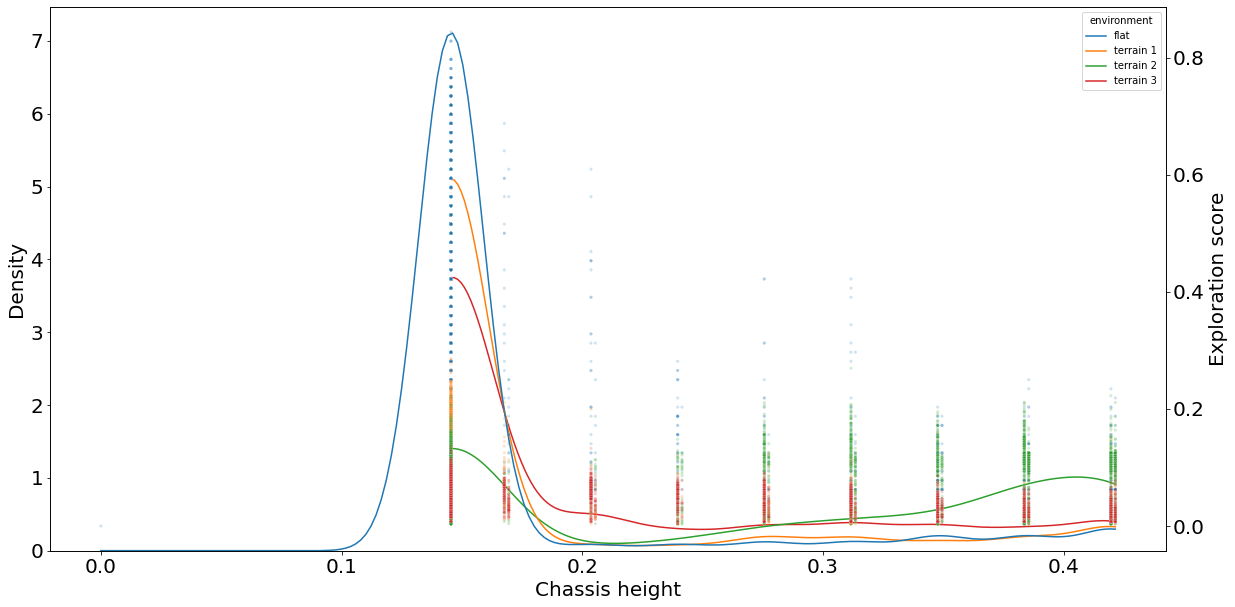

In [31]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="height",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis height")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="height",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

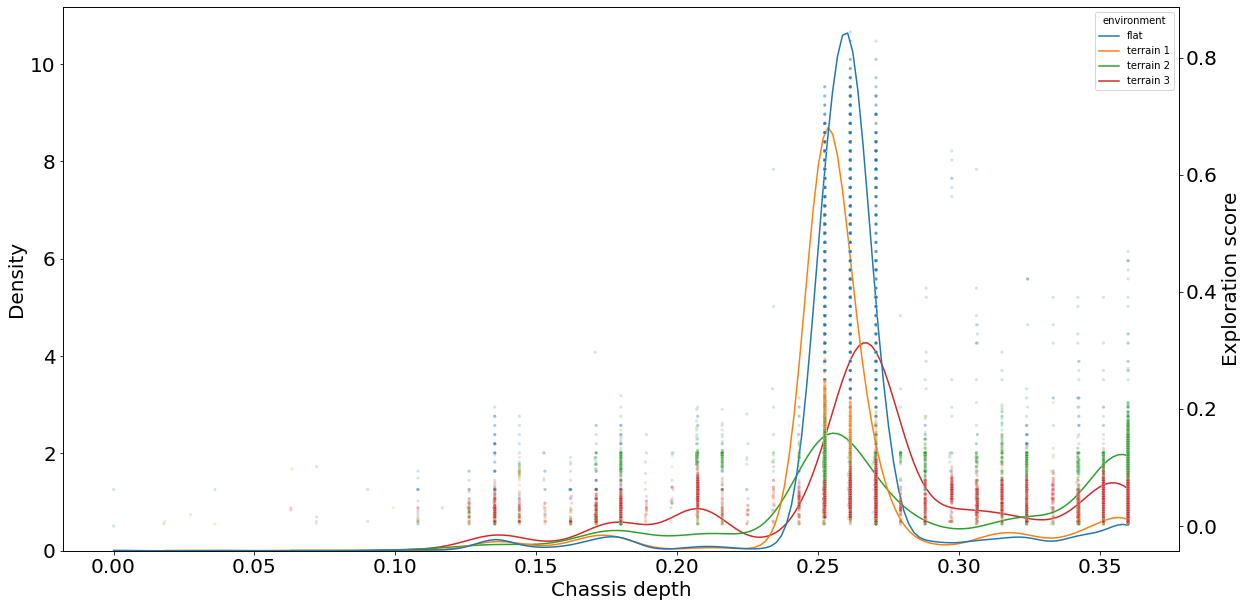

In [32]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="depth",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis depth")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="depth",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

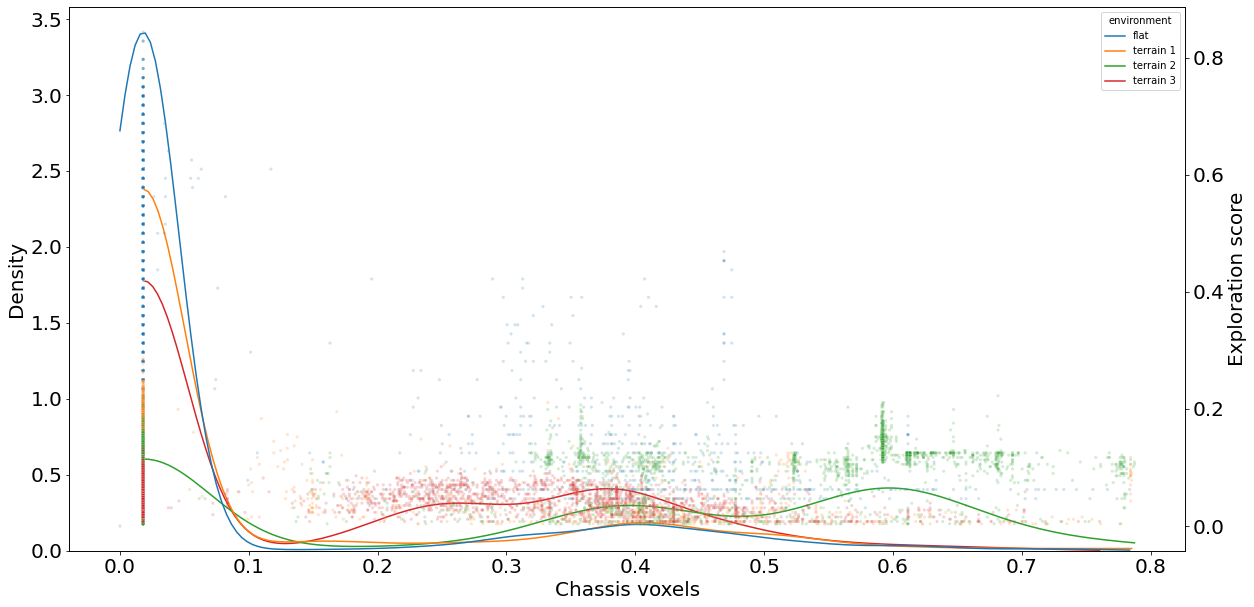

In [33]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="voxels",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis voxels")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="voxels",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

# Trajectories

In [5]:
import importlib
importlib.reload(medf)  

<module 'me_data_fcts' from '/home/leni/git/evolutionary_robotics_framework/experiments/scripts/me_data_fcts.py'>

In [19]:
#%%px --targets 0 --noblock
# repo_folder = "/home/leni/remote-logs/"
# mehk_t1_folder = repo_folder + "mehk_terrains/terrain_1"
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    for file in os.listdir(mehk_t1_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in medf.load_trajectory(mehk_t1_folder + "/" + folder + "/" + file,10)]
    
traj_data1 = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])


<AsyncResult(%px): pending>

In [26]:
%%px --targets 1 --noblock
repo_folder = "/home/leni/remote-logs/"
mehk_t2_folder = repo_folder + "mehk_terrains/terrain_2"
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t2_folder):
    print(folder)
    for file in os.listdir(mehk_t2_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in me_data_fcts.load_trajectory(mehk_t2_folder + "/" + folder + "/" + file,100)]
    
traj_data2 = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])

<AsyncResult(%px): pending>

In [24]:
%%px --targets 2 --noblock
repo_folder = "/home/leni/remote-logs/"
mehk_t3_folder = repo_folder + "mehk_terrains/terrain_3"
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    for file in os.listdir(mehk_t3_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in me_data_fcts.load_trajectory(mehk_t2_folder + "/" + folder + "/" + file,100)]
    
traj_data3 = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])

<AsyncResult(%px): pending>

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
fg = sns.displot(data=traj_data,x="x",y="y",col="environment",kind="hist",binwidth=0.25,aspect=1)
fg.set(xlim=[-2,2],ylim=[-2,2])